In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import glob
plt.style.use('default')
%matplotlib inline



In [2]:
trial = pd.read_csv('F:\Apprendre\Velo\TestCPCinqMin.csv')

cadence = trial['cad']
watts = trial['watts']
heart_rate = trial['hr']



trial.head()

,secs,cad,hr,km,kph,nm,watts,alt,lon,lat,...,interval,lrbalance,lte,rte,lps,rps,smo2,thb,o2hb,hhb
0,1,72.0,99.0,0.004603,20.0196,0,94,37.5333,0.0,0.0,...,0,-255,0,0,0,0,0,0,0,0
1,2,64.0,100.0,0.009207,20.2212,0,122,37.6667,0.0,0.0,...,0,-255,0,0,0,0,0,0,0,0
2,3,56.0,101.0,0.013810,20.4228,0,150,37.8000,0.0,0.0,...,0,-255,0,0,0,0,0,0,0,0
3,4,56.0,102.0,0.017010,20.4228,0,150,37.6000,0.0,0.0,...,0,-255,0,0,0,0,0,0,0,0
4,5,62.0,103.0,0.022990,21.4992,0,144,37.8000,0.0,0.0,...,0,-255,0,0,0,0,0,0,0,0


In [4]:
trial.shape

(2710, 23)

In [5]:
trial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2710 entries, 0 to 2709
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   secs       2710 non-null   int64  
 1   cad        2710 non-null   float64
 2   hr         2710 non-null   float64
 3   km         2710 non-null   float64
 4   kph        2710 non-null   float64
 5   nm         2710 non-null   int64  
 6   watts      2710 non-null   int64  
 7   alt        2710 non-null   float64
 8   lon        2710 non-null   float64
 9   lat        2710 non-null   float64
 10  headwind   2710 non-null   int64  
 11  slope      2710 non-null   float64
 12  temp       2710 non-null   int64  
 13  interval   2710 non-null   int64  
 14  lrbalance  2710 non-null   int64  
 15  lte        2710 non-null   int64  
 16  rte        2710 non-null   int64  
 17  lps        2710 non-null   int64  
 18  rps        2710 non-null   int64  
 19  smo2       2710 non-null   int64  
 20  thb     

In [7]:
trial.describe()

,secs,cad,hr,km,kph,nm,watts,alt,lon,lat,...,interval,lrbalance,lte,rte,lps,rps,smo2,thb,o2hb,hhb
count,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.0,2710.000000,2710.000000,2710.0,2710.0,...,2710.0,2710.0,2710.0,2710.0,2710.0,2710.0,2710.0,2710.0,2710.0,2710.0
mean,1355.500000,75.261255,144.194465,10.426439,26.791211,0.0,169.050554,38.327380,0.0,0.0,...,0.0,-255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,782.453939,10.707404,17.019393,5.947646,5.420163,0.0,106.360174,0.608624,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,0.000000,99.000000,0.004603,0.000000,0.0,0.000000,37.000000,0.0,0.0,...,0.0,-255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,678.250000,68.000000,132.000000,5.181665,22.975200,0.0,94.000000,37.700025,0.0,0.0,...,0.0,-255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1355.500000,75.000000,140.000000,10.681800,25.966800,0.0,137.000000,38.400000,0.0,0.0,...,0.0,-255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,2032.750000,83.000000,160.000000,15.567575,29.124000,0.0,217.750000,38.800000,0.0,0.0,...,0.0,-255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,2710.000000,116.000000,178.000000,20.141400,45.950400,0.0,824.000000,39.400000,0.0,0.0,...,0.0,-255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Your Vo2max is : 321.18
Your VO2max is found at 908 seconds into this file
Your Heart rate at VO2max is 167.87 bpm


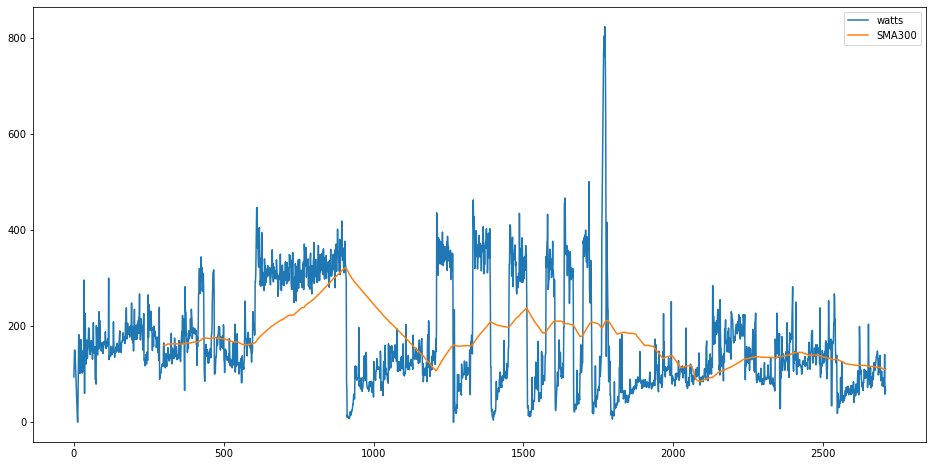

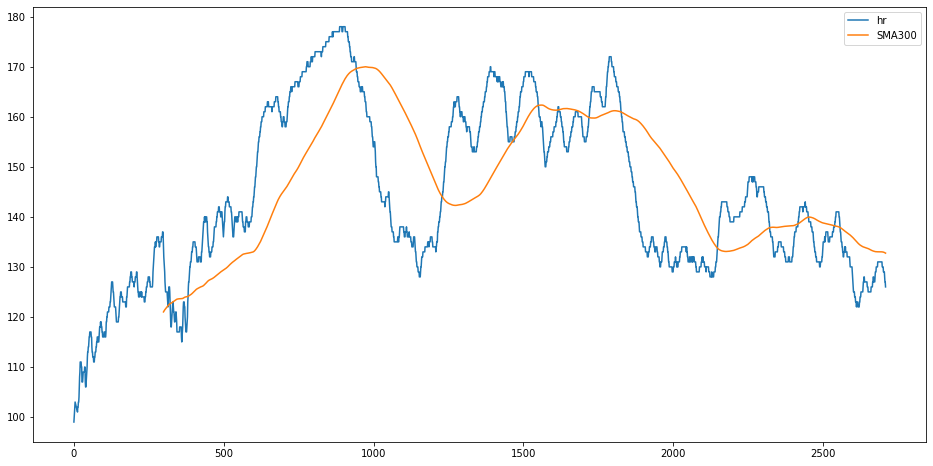

In [60]:
#Get the moving mean for 300 seconds (5min)


five_minute_cp_SMA = watts.to_frame()
five_minute_cp_SMA ['SMA300'] = five_minute_cp_SMA['watts'].rolling(300).mean()

five_minute_cp_SMA[['watts', 'SMA300']].plot(label='five_minute_cp_SMA', 
                                  figsize=(16, 8))
five_minute_cp_SMA = five_minute_cp_SMA[five_minute_cp_SMA['SMA300'].notna()]
vo2max = max(five_minute_cp_SMA['SMA300'])

print (f"Your Vo2max is : {vo2max}")

index = 299
for value in five_minute_cp_SMA ['SMA300']:
    index +=1
    if value == vo2max:
        index_cp5 = index
        print (f"Your VO2max is found at {index_cp5} seconds into this file")


five_minute_heart_rate_SMA = heart_rate.to_frame()
five_minute_heart_rate_SMA ['SMA300'] = five_minute_heart_rate_SMA['hr'].rolling(300).mean()

five_minute_heart_rate_SMA[['hr', 'SMA300']].plot(label='five_minute_cp_SMA', 
                                  figsize=(16, 8))
five_minute_heart_rate_SMA = five_minute_heart_rate_SMA[five_minute_heart_rate_SMA['SMA300'].notna()]


heart_rate_at_vo2max = five_minute_heart_rate_SMA ['SMA300'][index_cp5]
print (f"Your Heart rate at VO2max is {heart_rate_at_vo2max} bpm")



In [119]:
pip install -U notebook-as-pdf


  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-py3-none-any.whl size=61101 sha256=c9128fd2bf07606147d0c68883b9ba743ace661f9e17c937b74844b95223d627
  Stored in directory: c:\users\raphael ouellet\appdata\local\pip\cache\wheels\d9\dc\ec\72da68331f30074b9950c1737c23cb8a67484e61498bc9713d
Successfully built PyPDF2
